In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/coal supply data.csv')

In [ ]:
data.shape

(585, 8)

In [ ]:
pd.set_option('display.max_columns', None)
print(data.head())

  Country           State  Year Coal Category Coal Supplying Company Name  \
0   India       Rajasthan  2019       LIGNITE                      VSLPPL   
1   India  Madhya Pradesh  2017          COAL                         WCL   
2   India       Jharkhand  2012          COAL                        BCCL   
3   India  Madhya Pradesh  2013          COAL                         WCL   
4   India       Rajasthan  2012       LIGNITE                      VSLPPL   

  Coal Supplyling Sector    Coal Type  Coal Supplied (UOM:t(Tonnes))  
0           OTHER PUBLIC      LIGNITE                          0.305  
1                    CIL      COOKING                          0.130  
2                    CIL  NON-COOKING                          2.957  
3                    CIL      COOKING                          0.330  
4           OTHER PUBLIC      LIGNITE                          0.843  


In [ ]:
data.drop('Country', axis=1, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)
print(data.head())

            State  Year Coal Category Coal Supplying Company Name  \
0       Rajasthan  2019       LIGNITE                      VSLPPL   
1  Madhya Pradesh  2017          COAL                         WCL   
2       Jharkhand  2012          COAL                        BCCL   
3  Madhya Pradesh  2013          COAL                         WCL   
4       Rajasthan  2012       LIGNITE                      VSLPPL   

  Coal Supplyling Sector    Coal Type  Coal Supplied (UOM:t(Tonnes))  
0           OTHER PUBLIC      LIGNITE                          0.305  
1                    CIL      COOKING                          0.130  
2                    CIL  NON-COOKING                          2.957  
3                    CIL      COOKING                          0.330  
4           OTHER PUBLIC      LIGNITE                          0.843  


In [ ]:
data.sort_values(by=['State','Year'], inplace=True)

In [ ]:
print(data.head())

                 State  Year Coal Category Coal Supplying Company Name  \
237     Andhra Pradesh  2011          COAL                        SCCL   
76      Andhra Pradesh  2012          COAL                        SCCL   
138     Andhra Pradesh  2013          COAL                        SCCL   
304     Andhra Pradesh  2014          COAL                        SCCL   
433  Arunachal Pradesh  2011          COAL                     APMDTCL   

    Coal Supplyling Sector    Coal Type  Coal Supplied (UOM:t(Tonnes))  
237           OTHER PUBLIC  NON-COOKING                      30.088887  
76            OTHER PUBLIC  NON-COOKING                      30.603527  
138           OTHER PUBLIC  NON-COOKING                      31.177369  
304           OTHER PUBLIC  NON-COOKING                      29.582452  
433           OTHER PUBLIC  NON-COOKING                       0.299000  


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Handle missing data by imputation (filling missing values)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Remove the target variable from the features
X = data.drop('Coal Supplied (UOM:t(Tonnes))', axis=1)
y = data['Coal Supplied (UOM:t(Tonnes))']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_regressor.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Regressor MSE:", rf_mse)

state_wise_predictions = rf_regressor.predict(X_encoded)

# Combine predictions with the original data
predictions_df = pd.DataFrame({'State': data['State'], 'Predicted Coal Supply (UOM:t(Tonnes))': state_wise_predictions})
print(predictions_df)

Random Forest Regressor MSE: 29.6328459305848
                 State  Predicted Coal Supply (UOM:t(Tonnes))
237     Andhra Pradesh                              29.325315
76      Andhra Pradesh                              29.441819
138     Andhra Pradesh                              29.411566
304     Andhra Pradesh                              29.393247
433  Arunachal Pradesh                               0.271575
..                 ...                                    ...
543        West Bengal                               2.382860
544        West Bengal                               2.134010
545        West Bengal                               1.685700
556        West Bengal                               0.197873
579        West Bengal                               1.804320

[585 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
r2 = r2_score(y_test, rf_predictions)

In [ ]:
print(r2)

0.9544908055419236


In [ ]:
print(y_test)
print(rf_predictions)

98       0.031
355    137.901
270      0.190
452      0.790
560      0.034
        ...   
145      0.403
548     23.580
42       0.560
534      1.740
461      0.000
Name: Coal Supplied (UOM:t(Tonnes)), Length: 117, dtype: float64
[9.03428432e-02 1.22646330e+02 4.13991000e+00 1.16928000e+00
 7.03800000e-01 2.89390000e-01 1.42520000e-01 2.15870700e+01
 1.11017655e-02 1.84740000e-01 3.26988000e+00 1.22632530e+02
 1.81600000e+00 3.53045900e+01 2.62413281e-01 4.95230000e-01
 2.62760000e-01 1.01259200e+01 2.15475000e+00 1.69176100e+01
 1.27782500e+01 1.83489600e+01 2.94115656e+01 1.51690000e+00
 9.10283062e-01 1.83097000e+00 9.84460000e-01 2.38286000e+00
 7.87680000e-01 8.51840000e-01 3.77000000e-02 1.94943281e-01
 3.29220000e-01 2.69814700e+01 1.03218000e+00 2.42440000e-01
 1.04962340e+02 5.26300000e-02 6.50680000e+00 6.14700000e-01
 3.09328432e-02 9.49300000e-02 7.15190000e+00 6.04740000e-01
 1.37062843e-01 7.47961238e-02 2.34151689e-01 2.64650774e+01
 1.61834300e+01 6.26967300e+01 2.79170

In [ ]:
y_test_sum = y_test.sum()

# Calculate the sum of rf_predictions
rf_predictions_sum = rf_predictions.sum()

# Print the sums
print("Sum of y_test:", y_test_sum)
print("Sum of rf_predictions:", rf_predictions_sum)

Sum of y_test: 1313.2200629679999
Sum of rf_predictions: 1361.70780252872


In [ ]:
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_regressor.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)

r2_new = r2_score(y_test, gb_predictions)
print(r2_new)

0.8798941908070419


In [ ]:
import matplotlib.pyplot as plt

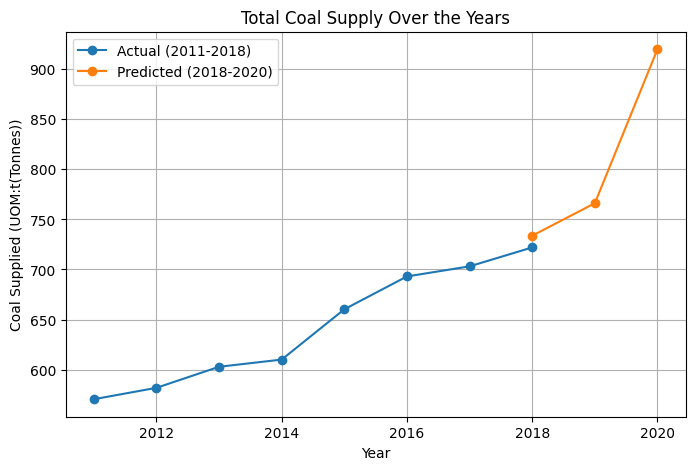

In [ ]:
# Combine predictions with the original data
predictions_df['Year'] = data['Year']  # Adding the 'Year' column from the original data to predictions_df

# Calculate the total coal consumed for each year
total_coal_supply_actual = data[data['Year'].isin(range(2011, 2019))].groupby('Year')['Coal Supplied (UOM:t(Tonnes))'].sum()
total_coal_supply_predicted = predictions_df[predictions_df['Year'].isin(range(2018, 2021))].groupby('Year')['Predicted Coal Supply (UOM:t(Tonnes))'].sum()

# Plot the line graph
plt.figure(figsize=(8, 5))
plt.plot(total_coal_supply_actual.index, total_coal_supply_actual.values, label='Actual (2011-2018)', marker='o')
plt.plot(total_coal_supply_predicted.index, total_coal_supply_predicted.values, label='Predicted (2018-2020)', marker='o')

plt.xlabel('Year')
plt.ylabel('Coal Supplied (UOM:t(Tonnes))')
plt.title('Total Coal Supply Over the Years')
plt.legend()
plt.grid(True)
plt.show()

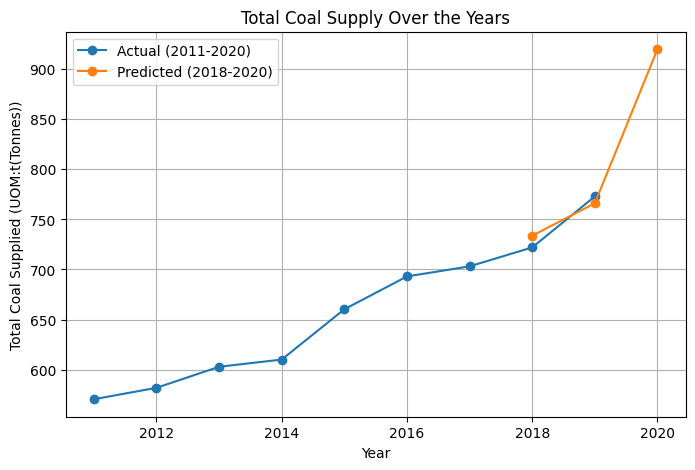

In [ ]:
# Combine predictions with the original data
predictions_df['Year'] = data['Year']  # Adding the 'Year' column from the original data to predictions_df

# Calculate the total coal consumed for each year
total_coal_supply_actual = data[data['Year'].isin(range(2011, 2020))].groupby('Year')['Coal Supplied (UOM:t(Tonnes))'].sum()
total_coal_supply_predicted = predictions_df[predictions_df['Year'].isin(range(2018, 2021))].groupby('Year')['Predicted Coal Supply (UOM:t(Tonnes))'].sum()

# Plot the line graph
plt.figure(figsize=(8, 5))
plt.plot(total_coal_supply_actual.index, total_coal_supply_actual.values, label='Actual (2011-2020)', marker='o')
plt.plot(total_coal_supply_predicted.index, total_coal_supply_predicted.values, label='Predicted (2018-2020)', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Coal Supplied (UOM:t(Tonnes))')
plt.title('Total Coal Supply Over the Years')
plt.legend()
plt.grid(True)
plt.show()


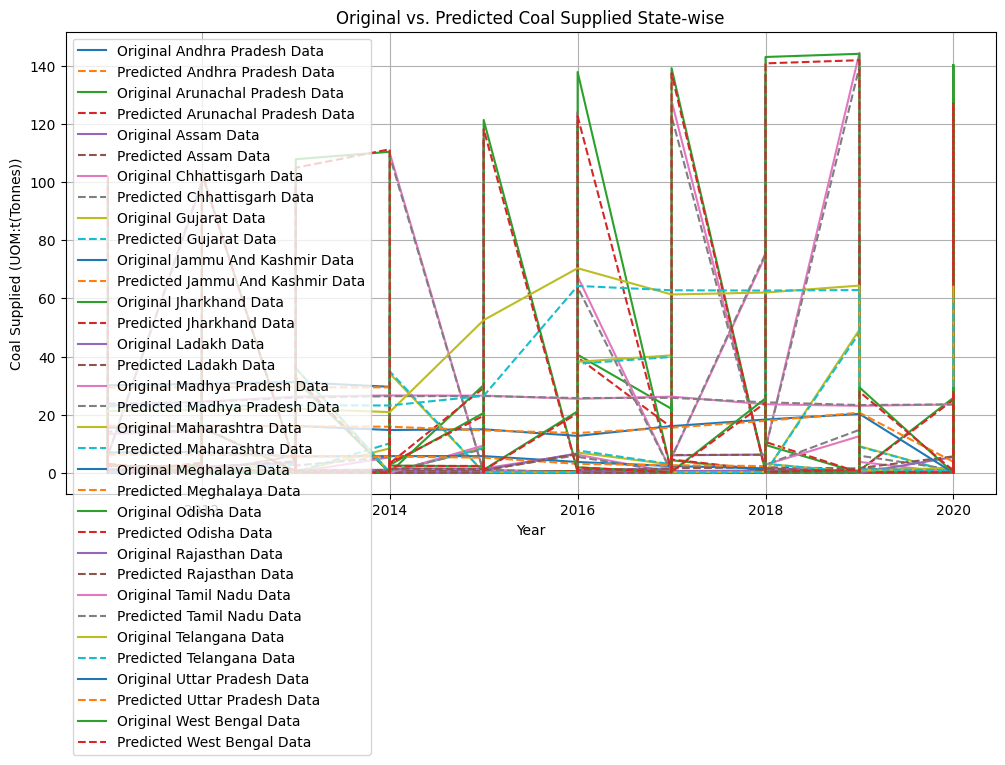

In [ ]:
plt.figure(figsize=(12, 6))
for state in data['State'].unique():
    state_data = data[data['State'] == state]
    plt.plot(state_data['Year'], state_data['Coal Supplied (UOM:t(Tonnes))'], label=f'Original {state} Data')
    predicted_state_data = predictions_df[predictions_df['State'] == state]
    plt.plot(state_data['Year'], predicted_state_data['Predicted Coal Supply (UOM:t(Tonnes))'], linestyle='dashed', label=f'Predicted {state} Data')

plt.xlabel('Year')
plt.ylabel('Coal Supplied (UOM:t(Tonnes))')
plt.title('Original vs. Predicted Coal Supplied State-wise')
plt.legend()
plt.grid(True)
plt.show()

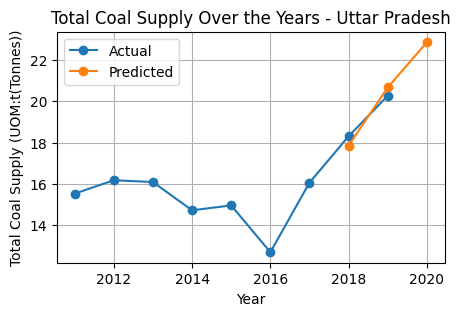

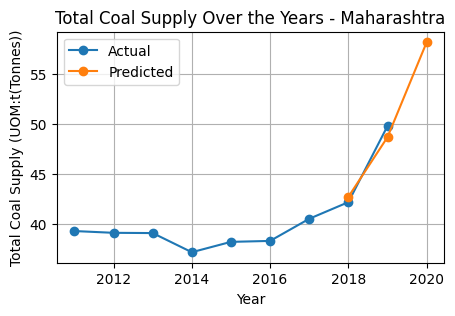

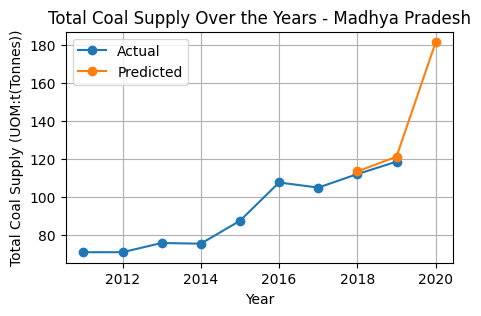

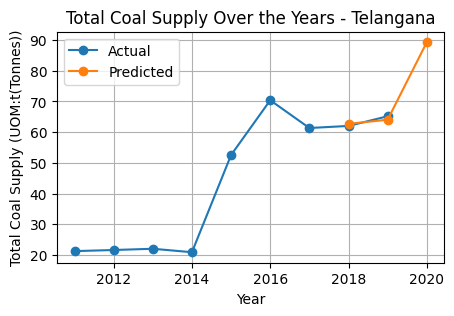

In [ ]:
# List of states
states_of_interest = ['Uttar Pradesh','Maharashtra','Madhya Pradesh','Telangana']

# Plot line graph for each state
for state in states_of_interest:
    # Filter data for the current state
    state_data = data[data['State'] == state]

    # Calculate the total coal consumed for each year
    total_coal_supply_actual = state_data[state_data['Year'].isin(range(2011, 2020))].groupby('Year')['Coal Supplied (UOM:t(Tonnes))'].sum()
    total_coal_supply_predicted = predictions_df[predictions_df['Year'].isin(range(2018, 2021)) & (predictions_df['State'] == state)].groupby('Year')['Predicted Coal Supply (UOM:t(Tonnes))'].sum()

    # Plot the line graph for the current state
    plt.figure(figsize=(5, 3))
    plt.plot(total_coal_supply_actual.index, total_coal_supply_actual.values, label='Actual', marker='o')
    plt.plot(total_coal_supply_predicted.index, total_coal_supply_predicted.values, label='Predicted', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Total Coal Supply (UOM:t(Tonnes))')
    plt.title(f'Total Coal Supply Over the Years - {state}')
    plt.legend()
    plt.grid(True)
    plt.show()
